Importing relevant libraries

In [1]:
#importing all required packages
import os
import numpy as np
from keras import layers
from keras import models
from tensorflow.keras.applications import VGG19
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix
np.random.seed(1)
import tensorflow
import seaborn as sns
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt


Defining the model ..

We have used the convolution base of VGG19 i.e. 16 layers and chopped of the three dense layers

Then we have added our own four dense layes on top

Then we have trained both the convolution base and the new classifier jointly

In [2]:
#convolution base of VGG19
conv_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(224,224,3))

model = models.Sequential()
model.add(conv_base)
#Adding a dense classifier on top of pretrained convolution base of VGG19
tensorflow.random.set_seed(1)
#First flattening the convolution output
model.add(layers.Flatten())
#Adding a dense layer with 256 neurons
model.add(layers.Dense(256, activation='relu'))
#Adding a dropout layer to minimize overfitting
model.add(layers.Dropout(0.2))
#Adding another dense layer with 120 neurons
model.add(layers.Dense(120, activation='relu'))
#Adding a dropout layer to minimize overfitting
# model.add(layers.Dropout(0.2))
#Adding another dense layer with 10 neurons
model.add(layers.Dense(10, activation='relu'))
#Adding a dropout layer to minimize overfitting
# model.add(layers.Dropout(0.2))
#Adding the output layer with two neurons to classify the output as stone or no stone
model.add(layers.Dense(2, activation='sigmoid'))

#compiling the model
model.compile(loss='categorical_crossentropy',  #loss for binary classification
              optimizer=optimizers.RMSprop(0.0001), #RMS optimizer
              metrics=['accuracy'])
#checking the summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 120)               30840     
                                                                 
 dense_2 (Dense)             (None, 10)                1210      
                                                                 
 dense_3 (Dense)             (None, 2)                 2

Image augmentation refers to making multiple images from a given image... This removes the constraint of having less daat

Image geneartor yields images in batches so that they can be processed in paralel. Without them, the training will become very lengthy.

In [3]:
#directory which contains our data
base_dir = '/content/drive/MyDrive/floor_classification'
#directory for training data
train_dir = os.path.join(base_dir, 'Train')
#directory for testing data
test_dir = os.path.join(base_dir, 'Test')
#datagenerator for augmenting training data i.e. making more images from the available images.. 
#Although we havent usedaugmentation in this case
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                  #  width_shift_range=0.2,
                                  #  height_shift_range=0.2,
                                  #  shear_range=0.2,
                                  #  zoom_range=0.2,
                                  #  horizontal_flip=True,
                                  #  fill_mode='nearest',
                                   validation_split=0.2)

#data generator to yield data in batches of 64
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    subset='training')
#validation data
validation_generator = train_datagen.flow_from_directory(train_dir,
                                                        target_size=(224, 224),
                                                        batch_size=64,
                                                        class_mode='categorical',
                                                        subset='validation')

Found 522 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


In [4]:
#training the model
history = model.fit(train_generator,
                    epochs=35,
                    batch_size=64,
                    validation_data=validation_generator)
#saving the model to be used later on
model.save('floor.h5')

Epoch 1/35
3/9 [=========>....................] - ETA: 45s - loss: 1.2706 - accuracy: 0.5580 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


9/9 [==============================] - 54s 5s/step - loss: 0.7785 - accuracy: 0.5939 - val_loss: 0.7221 - val_accuracy: 0.4769
Epoch 2/35
9/9 [==============================] - 29s 3s/step - loss: 0.6434 - accuracy: 0.5556 - val_loss: 0.2936 - val_accuracy: 0.9538
Epoch 3/35
9/9 [==============================] - 30s 3s/step - loss: 0.7451 - accuracy: 0.7644 - val_loss: 0.2314 - val_accuracy: 0.9923
Epoch 4/35
9/9 [==============================] - 32s 3s/step - loss: 0.2591 - accuracy: 0.9100 - val_loss: 0.0349 - val_accuracy: 0.9923
Epoch 5/35
9/9 [==============================] - 30s 3s/step - loss: 0.1284 - accuracy: 0.9521 - val_loss: 0.0163 - val_accuracy: 0.9923
Epoch 6/35
9/9 [==============================] - 29s 3s/step - loss: 0.1042 - accuracy: 0.9693 - val_loss: 0.0227 - val_accuracy: 0.9923
Epoch 7/35
9/9 [==============================] - 29s 3s/step - loss: 0.0793 - accuracy: 0.9789 - val_loss: 0.0087 - val_accuracy: 0.9923
Epoch 8/35
9/9 [=============================

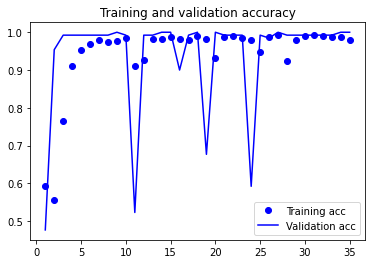

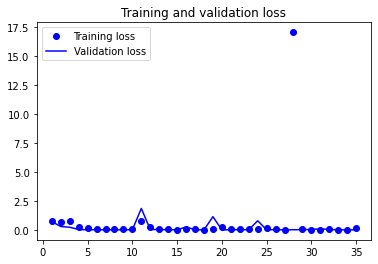

In [5]:
#plotting training and validation accuracy
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
#plotting training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [6]:
#datagenerator for testing data
test_datagen = ImageDataGenerator(rescale=1./255)
#test data
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=100,
                                                  shuffle=False,
                                                  class_mode='categorical')

Found 123 images belonging to 2 classes.


# Testing model performance

In [7]:
#predicting the model for testing data
y_pred= model.predict(test_generator)
#testing labels
y_true= test_generator.classes
#finding confusion matrix for test data
cnf_matrix= confusion_matrix(y_true,y_pred.argmax(axis=1))
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[62  0]
 [ 0 61]]


In [8]:
#False Positives
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
#False Negatives
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
#True Positives
TP = np.diag(cnf_matrix)
#True Negatives
TN = cnf_matrix.sum() - (FP + FN + TP)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [9]:
print('Sensitivity:\n',TPR)
print('Specificity:\n',TNR)
print('Precision:\n',PPV)
print('Overall Accuracy for each class:\n',ACC)

Sensitivity:
 [1. 1.]
Specificity:
 [1. 1.]
Precision:
 [1. 1.]
Overall Accuracy for each class:
 [1. 1.]


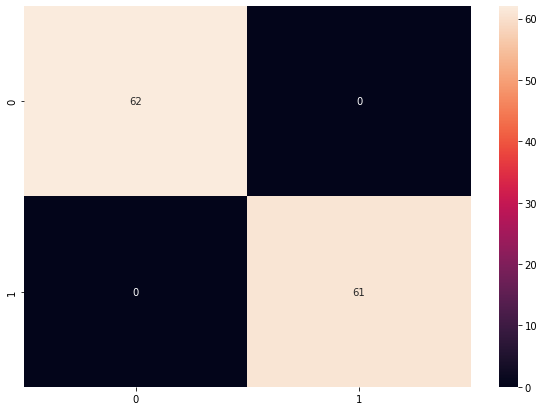

In [10]:
#generating heat map for confusion matrix
plt.figure(figsize = (10,7))
sns.heatmap(cnf_matrix, annot=True)

# Checking the model on real world data

#Custom image selection and prediction

Populating the interactive namespace from numpy and matplotlib


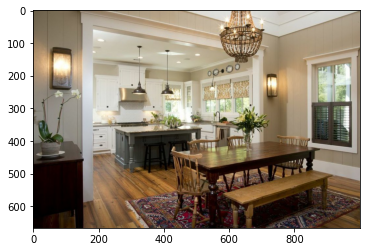

Found 1 images belonging to 1 classes.

 
 Prediction: Not a Floor plan


In [11]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/floor_classification/for_test/Not_a_floor_plan/get_asset+2.jpg')
imgplot = plt.imshow(img)
plt.show()

#directory for training data
td = os.path.join(base_dir, 'for_test')

#datagenerator for augmenting training data i.e. making more images from the available images
tg = ImageDataGenerator(rescale=1./255)
#training data
tgr = tg.flow_from_directory(td,
                             target_size=(224, 224),
                             batch_size=1,
                             class_mode='categorical')

pred = model.predict(tgr)
pred = pred.reshape(-1)
if pred[0]> pred[1]:
  print('\n \n Prediction: Floor Plan')
else:
  print('\n \n Prediction: Not a Floor plan')

Populating the interactive namespace from numpy and matplotlib


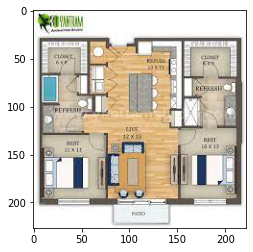

Found 1 images belonging to 1 classes.

 
 Prediction: Floor Plan


In [12]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/floor_classification/for_test_1/Floor_plan/fp.jpg')
imgplot = plt.imshow(img)
plt.show()

#directory for training data
td = os.path.join(base_dir, 'for_test_1')

#datagenerator for augmenting training data i.e. making more images from the available images
tg = ImageDataGenerator(rescale=1./255)
#training data
tgr = tg.flow_from_directory(td,
                             target_size=(224, 224),
                             batch_size=1,
                             class_mode='categorical')

pred = model.predict(tgr)
pred = pred.reshape(-1)
if pred[0]> pred[1]:
  print('\n \n Prediction: Floor Plan')
else:
  print('\n \n Prediction: Not a Floor plan')